# The Tipping Problem

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

## Defining Variables 

In [22]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [23]:
quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13,25, 25])



C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


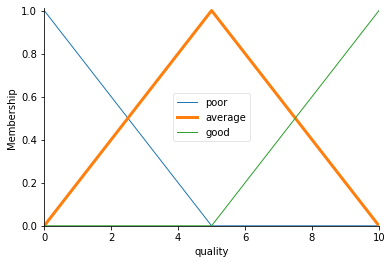

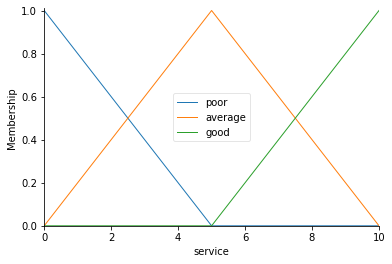

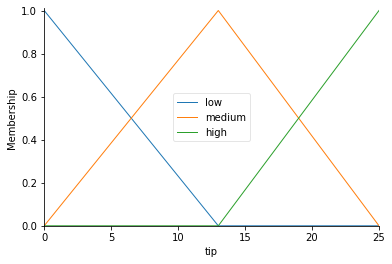

In [24]:
quality['average'].view()
service.view()
tip.view()

## Defining Rules 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

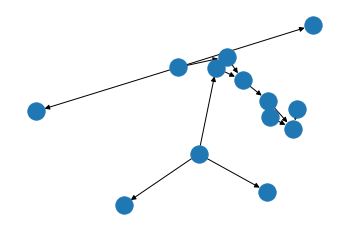

In [26]:
rules = [
    # Rule 1
    ctrl.Rule(quality['poor'] | service['poor'], tip['low']),
    # Rule 2
    ctrl.Rule(service['average'], tip['medium']),
    #Rule 3
    ctrl.Rule(service['good'] | quality['good'], tip['high'])
]

rules[0].view()

## Inference System 

In [30]:
tipping_ctrl = ctrl.ControlSystem(rules)
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

19.847607361963192


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


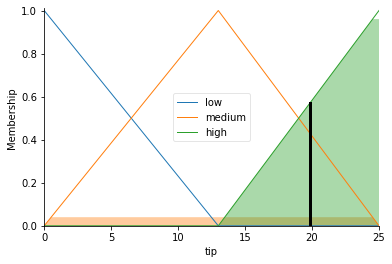

In [32]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()
print(tipping.output['tip'])

tip.view(sim=tipping)